# Projeto 2 - T320 (2S2022)


### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão aceitas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Substitua os nomes que já estão no campo abaixo.
7. Você pode consultar todo o material de aula.
8. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
9. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

### 1) Neste exercício, você irá utilizar validação cruzada para encontrar a melhor configuração para que uma rede MLP separe duas classes.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

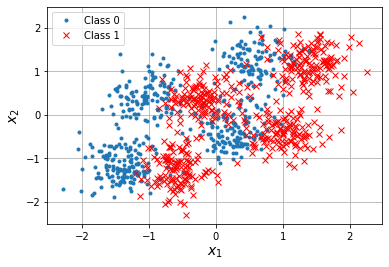

Dimensões de X: (1000, 2)
Dimensão de y: (1000,)


In [1]:
# Import all the necessary libraries.
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import urllib

# reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Retrieve the dataset from dropbox.
urllib.request.urlretrieve('https://www.dropbox.com/s/fvoa3rzpusdkgms/dados_treinamento.mat?dl=1', 'dados_treinamento.mat')

# Load dataset.
mat = scipy.io.loadmat('dados_treinamento.mat')

# Split dataset into attributes and labels.
X = mat['X']
y = mat['y'].reshape(1000,)

# Plot the classes.
idx0 = np.argwhere(y==-1)
idx1 = np.argwhere(y==1)
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Print dimensions.
print('Dimensões de X:', X.shape)
print('Dimensão de y:', y.shape)

2. Use busca exaustiva (`GridSearchCV`) e o **conjunto total de amostras** para treinar um objeto da classe `MLPClassifier` para encontrar os valores ideais para alguns parâmetros da rede MLP de tal forma que o modelo classifique o melhor possível as duas classes.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de parâmetros de um modelo, neste caso, os parâmetros do objeto da classe `MLPClassifier`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus parâmetros. O dicionário de parâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `MLPClassifier` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPClassifier` com todas as combinações possíveis dos parâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes parâmetros.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure os parâmetros de entrada `max_iter` com o valor `10000` e `solver` com a string `lbfgs`.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós e camadas escondidas, (ii) a função de ativação ideal dos nós, (iii) o melhor otimizador e (iv) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `(4,)`, `(6,)`, `(4,2)`, e `(6,3)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'`, e `'relu'`.
    * `'random_state'`  com os valores `1`, `42`, `51`, `69`, e `250`.
+ O treinamento pode ser demorado, então pegue um café e tenha paciência.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes parâmetros:
    * número de *folds* para o k-Fold igual a 5, ou seja, `cv=5`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='accuracy'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Ao terminar a busca pelo melhor conjunto de parâmetros, o objeto da classe `GridSearchCV` treina, internamente, um objeto da classe `MLPClassifier` com esses valores ideais. Portanto, ao final do busca, você pode usar o objeto da classe `GridSearchCV` para fazer predições.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [2]:
# Digite aqui o código do exercício.

3. Após o treinamento, imprima quais foram os melhores valores encontrados pela grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [3]:
# Digite aqui o código do exercício.

4. Plote a matriz de confusão da rede MLP para o conjunto total de amostras.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/classification_metrics.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [2]:
# Digite aqui o código do exercício.

5. Qual é a acurácia da rede MLP? Calcule e imprima o valor da acurácia usando o **conjunto total de amostras**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/classification_metrics.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [4]:
# Digite aqui o código do exercício.

6. Crie uma figura mostrando as regiões de decisão da rede MLP.

**DICA**

+ Neste exercício, não usamos o atributo de bias, portanto a matriz de atributos, $X$, contém apenas duas colunas, ou seja, as colunas dos atributos $x_1$ e $x_2$, respectivamente.
+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/classification_metrics.ipynb).
+ **Atenção, não basta apenas copiar o código do exemplo dado, você precisa alterá-lo.**

In [3]:
# Digite aqui o código do exercício.

7. Após analisar a figura com as regiões de decisão, reponda:

+ Por que a separação das classes não é perfeita?
+ Se tivéssemos encontrado um classificador perfeito, ou seja, com 100% de acurácia, para o conjunto de amostras que temos no exercício, você acredita que este classificador teria uma boa capacidade de generalização, ou seja, classificar corretamente amostras que não foram vistas durante o treinamento? (**Justifique sua resposta.**)

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

### 2) Exercício sobre o modelo do neurônio de McCulloch e Pitts.

Usando-se o modelo do neurônio de McCulloch e Pitts, qual seria o valor do **limiar de ativação**, $\theta$, para classificar a função booleana dada pela tabela abaixo? Desenhe a função de ativação e o neurônio, indicando quais entradas são inibitórias, caso haja alguma.

**DICAS**: 

+ Como este exercício é teórico, anexe o arquivo com sua resposta em formato **pdf** na tarefa do MS Teams.
+ Você pode precisar ter uma ou mais entradas inibitórias para encontrar o valor de $\theta$.
    + Entradas inibitórias são entradas que têm seus valores **negados**.
    + Para **negar** um valor de entrada, você pode, por exemplo, multiplicá-lo por $-1$.
+ Os atributos de entrada são `x1`, `x2` e `x3` e o valor esperado, ou seja, a saída do neurônio, é dado por `y`.

| x1 | x2 | x3 | y |
|:--:|:--:|:--:|:-:|
|  0 |  0 |  0 | 0 |
|  0 |  0 |  1 | 0 |
|  0 |  1 |  0 | 0 |
|  0 |  1 |  1 | 1 |
|  1 |  0 |  0 | 0 |
|  1 |  0 |  1 | 0 |
|  1 |  1 |  0 | 0 |
|  1 |  1 |  1 | 0 |

### 3) Exercício sobre o uso da rede Multi Layer Perceptron (MLP) para regressão.

Neste exercício, usaremos uma rede MLP para a construção de um modelo de regressão que prevê tarifas de táxi a partir de dados publicados pela Comissão de Táxis e Limousines da cidade de Nova York.

Imagine que você trabalha para uma empresa de táxis e uma das maiores reclamações de seus clientes é que eles não sabem quanto custará uma corrida até que ela termine. Portanto, você decide fazer algo a respeito criando um aplicativo móvel que os clientes podem usar quando entram em um táxi para estimar qual será a tarifa. Para fornecer a inteligência para o aplicativo, você pretende usar as enormes quantidades de dados de tarifas que a empresa coletou ao longo dos anos para criar um modelo de aprendizado de máquina.

A base de dados que usaremos contém informações sobre corridas de táxi. Cada linha da base de dados representa uma corrida de táxi e contém informações como o valor da tarifa, os locais de embarque e desembarque (expressos em latitudes e longitudes) e a contagem de passageiros. É o valor da tarifa que tentaremos estimar.

O objetivo principal deste exercício é demonstrar a importância da análise, pré-processamento dos dados e comparação de resultados entre diferentes tipos de modelos.

1. Execute a célula de código abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.
+ O download da base de dados pode levar um certo tempo, então, por favor, tenha paciência.

In [17]:
# Importe todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Usando a biblioteca pandas para ler a base de dados.
df = pd.read_csv('https://www.dropbox.com/s/uegncchkd7yaznz/taxi-fares.csv?dl=1')

# Mostrando os primeiros cinco exemplos.
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00 UTC,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00 UTC,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,1


2. Neste exercício, estamos interessados apenas em prever o valor da tarifa para passageiros únicos. Portanto, execute a célula abaixo para remover todas as linhas com vários passageiros (mais de 1) e remover a coluna `key` do conjunto de dados, pois essa coluna não é necessária.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.

In [2]:
# Remove todas as linhas onde o número de passageiros é maior do que 1.
df = df[df['passenger_count'] == 1]

# Remove a coluna 'key', pois não é útil ao problema de regressão.
df = df.drop(['key', 'passenger_count'], axis=1)

# Mostrando os primeiros cinco exemplos.
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065


3. Agora, usaremos o método `corr` da classe `DataFrame` da biblioteca Pandas para descobrir quanta influência os atributos, como latitude e longitude, têm nos valores da coluna `fare_amount`, que é a coluna com os valores que queremos prever. O método `corr` calcula a correlação entre a o rótulo `fare_amount` e os atributos da base de dados. Quanto maior o valor do módulo da correlação, mais influência tem aquele atributo no valor da corrida. Execute a célula abaixo para compararmos as correlações.

**DICAS**:

+ A primeira linha mostra a correção entre `fare_amount` e ela mesma e, por isso, o valor é igual a 1.

In [3]:
# Calcula a correlação entre o rótulo e os atributos.
corr_matrix = df.corr()

# Ordena os valores das correlações em ordem descendente.
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

4. Após analisar as correlações, vemos que os números não parecem muito animadores. Latitudes e longitudes têm pouca relação (i.e., correlação) com os valores das tarifas, pelo menos em sua forma atual. Entretanto, intuitivamente, esses atributos deveriam ter muita correlação com os valores das tarifas, pois eles especificam pontos de partida e chegada e viagens mais longas incorrem em tarifas mais altas.

Para fazer com que a correlação entre os atributos e a tarifa aumente, devemos criar novos atributos a partir dos atributos presentes no banco de dados. Nós vamos criar novas colunas a partir de colunas já existentes aplicando transformações ao valores das colunas.

Vamos adicionar colunas especificando o dia da semana (0 = segunda-feira, 1 = domingo e assim por diante), a hora do dia em que o passageiro foi apanhado (0-23) e a distância em quilometros que o táxi percorreu. 

Execute a célula abaixo para criar as novas colunas e remover as colunas que não são mais necessárias.

**DICAS**

+ Para calcular as distâncias, este código assume que a maioria dos passeios são curtos e que, portanto, é seguro ignorar a curvatura da Terra.

In [4]:
# Cria novas colunas a partir dos valores das colunas existentes.
for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['pickup_datetime'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 87.87  # 1 degree == 87.87 kilmeters
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 111.045  # 1 degree == 111.045 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

# Remove as colunas que não são mais necessárias.
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)

# Imprime as 5 primeiras linhas.
df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,1.159528
2,6.1,0.0,15.0,1.670716
4,10.5,5.0,10.0,4.706266
5,15.3,4.0,20.0,7.826080
8,7.7,5.0,1.0,4.189922


5. Na célula abaixo, calculamos a correlação entre o rótulo e os novos atributos (i.e., colunas). Execute a célula abaixo e perceba que ainda não há uma forte correlação entre a distância percorrida e o valor da tarifa. 

In [5]:
# Calcula a correlação entre o rótulo e os atributos.
corr_matrix = df.corr()

# Ordena os valores das correlações em ordem descendente.
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount    1.000000
distance       0.045873
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

6. Vamos plotar o histograma das colunas da base de dados para tentar descobrir o motivo da baixa correlação. O que iremos procurar nas figuras são valores discrepantes, ou seja, valores que se distanciam muito da grande maioria de valores. Valores discrepantes afetam negativamente o treinamento de modelos de aprendizado de máquina.

Execute a célula de código abaixo e perceba que os histogramas da tarifa (`fare amount`) e da distância (`distance`) têm valores discrepantes. O histograma da tarifa possui valores negativos e o histograma da distância possui valores muito grandes, que não fazem sentido para corridas de taxi na cidade de Nova York.

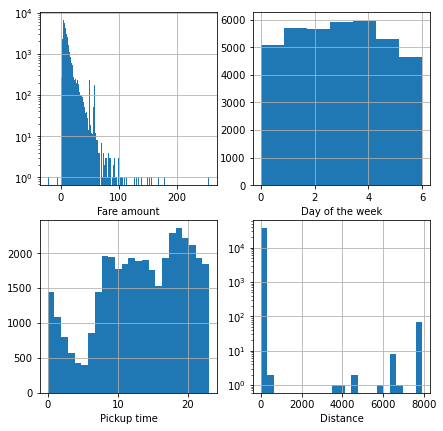

In [6]:
# Transforma cada coluna em uma array numpy.
fare = df['fare_amount'].to_numpy()
day = df['day_of_week'].to_numpy()
time = df['pickup_time'].to_numpy()
dist = df['distance'].to_numpy()

# Cria uma figura com 4 sub-figuras.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
# Histograma da tarifa.
ax1.hist(fare, bins=200)
ax1.set_xlabel('Fare amount')
ax1.set_yscale('log')
ax1.grid()
# Histograma do dia da semana.
ax2.hist(day, bins=7)
ax2.set_xlabel('Day of the week')
ax2.grid()
# Histograma da hora do início da corrida.
ax3.hist(time, bins=24)
ax3.set_xlabel('Pickup time')
ax3.grid()
# Histograma da distância.
ax4.hist(dist, bins=25)
ax4.set_xlabel('Distance')
ax4.set_yscale('log')
ax4.grid()
# Mostra a figura.
plt.show()

7. Na célula de código abaixo, filtramos o conjunto de dados eliminando valores de tarifa negativos e colocando limites razoáveis em valores de tarifas e distância e, em seguida, imprimimos os novos valores das correlações. 

Execute a célula abaixo para analisar os novos valores de correlação.

Veja que os valores parecem bem melhores. A correlação entre o dia da semana, a hora do dia e o valor da tarifa ainda é fraca, mas isso não é surpreendente, pois a distância percorrida é o principal fator que dita os valores das tarifas de táxi.

In [7]:
# Pega valores dentre de uma faixa razoável de valores.
df = df[(df['distance'] > 1.0) & (df['distance'] < 30.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 60.0)]

# Imprime a correlação entre a tarifa e os atributos.
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.908926
day_of_week    0.008673
pickup_time   -0.019063
Name: fare_amount, dtype: float64

8. Agora que conseguimos obter um conjunto de dados melhor através da análise e pré-processamento dos dados, podemos criar os conjuntos de treinamento (70%) e validação (30%) que usaremos para treinar e testar o desempenho de um modelo de regressão usando uma rede MLP. Execute a célula de código abaixo para gerar os conjuntos.

In [8]:
# Matriz de atributos.
X = df.drop(['fare_amount'], axis=1)
# Rótulos.
y = df['fare_amount']

# Separa conjunto de dados em conjuntos de treinamento e validação.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Imprime o tamanho dos conjuntos de treinamento e validação.
print('Tamanho do conjunto de treinamento:', len(y_train))
print('Tamanho do conjunto de validação:', len(y_test))

Tamanho do conjunto de treinamento: 21886
Tamanho do conjunto de validação: 9381


9. Neste item, iremos treinar e verificar o erro quadrático médio (MSE) cometido por um **regressor linear** na tarefa de estimar corridas de táxi. Treine o modelo de regressão linear com o conjunto de treinamento, calcule e imprima o erro quadrático médio cometido pelo modelo para os conjuntos de treinamento e validação.

**DICAS**

+ Instancie e treine um objeto da classe `LinearRegression`. A classe já foi importada durante a execução do item 1 deste exercício.
+ Para calcular os erros cometidos com os conjuntos de treinamento e validação, use a função `mean_squared_error`, a qual foi importada durante a execução da célula de código do item 1 deste exercício.

In [1]:
# Digite aqui o código do exercício.

10. Agora, vamos usar busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os melhores valores de alguns parâmetros de uma rede `MLPRegressor` de tal forma que ela apresente o menor erro possível.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de parâmetros de um modelo, neste caso, os parâmetros do objeto da classe `MLPRegressor`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus parâmetros. O dicionário de parâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `MLPRegressor` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPRegressor` com todas as combinações possíveis dos parâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes parâmetros.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPRegressor` configure os parâmetros de entrada `max_iter` com o valor `5000`, o parâmetro `learning_rate` com a string `'adaptive'` e o parâmetro `random_state` com a variável `seed`, definida no item 1 deste exercício.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós, (ii) a função de ativação ideal dos nós e (iii) o melhor otimizador.
+ O `GridSearchCV` deve testar o seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `(16,8)`, `(16,4)` e `(16,2)`.
    * `'activation'` com os valores `'logistic'` e `'relu'`.
    * `'solver'`  com os valores `lbfgs` e `sgd`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes parâmetros:
    * número de *folds* para o k-Fold igual a 5, ou seja, `cv=5`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='neg_mean_squared_error'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ O treinamento será demorado, então pegue um café e tenha paciência.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [2]:
# Digite aqui o código do exercício.

11. Após o treinamento, imprima quais foram os melhores valores encontrados pela grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [3]:
# Digite aqui o código do exercício.

12. Qual é o erro quadrático médio da rede MLP para os conjuntos de treinamento e validação?

In [4]:
# Digite aqui o código do exercício.

13. Compare os erros de treinamento e validação cometidos pelos dois modelos (i.e., regressor linear e rede MLP) e responda:

+ Qual dos dois modelos apresenta o melhor desempenho? (**Justifique sua resposta.**)

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

14. Vamos usar o **melhor dos dois modelos** para fazer um par de predições. Primeiro, estime quanto custará a corrida de um táxi para uma viagem de 4 quilômetros às 17 horas de uma sexta-feira. Em seguida, estime quanto custará a corrida de um táxi para uma viagem de 4 quilômetros às 17 horas de um domingo.

**DICAS**

+ Use o modelo treinado que **apresentou o melhor desempenho**.
+ Lembre-se que os dias da semana estão representados como números inteiros no intervalo de 0 a 6, onde segunda-feira é 0 e domingo é 6.
+ O vetor que você deve criar para usar com o método `predict` da rede MLP treinada deve ter o seguinte formato:
```python
model.predict([[dia, hora, distância]])
```

In [5]:
# Digite aqui o código do exercício.

15. O modelo prevê um valor de tarifa maior ou menor para a mesma viagem no domingo à tarde? Isso faz sentido, já que os dados vêm de táxis da cidade de Nova York?

**DICAS**

+ Nova York é a cidade mais populosa dos Estados Unidos.
+ Ela tem uma população superior a 8.8 milhões de habitantes, distribuídos numa área de terra de apenas 778 km². 
+ Sua região metropolitana é uma das áreas metropolitanas mais populosas do mundo.
+ A cidade é um centro global de negócios e comércio, como serviços bancários e financeiros, varejo, comércio mundial, transportes, turismo, imóveis, novas mídias, mídia tradicional, publicidade, serviços jurídicos, contabilidade, seguros, teatro, moda e artes.
+ A cidade sofre com muitos problemas de trânsito, onde grandes congestionamentos são comuns de manhã e no final da tarde.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

16. Plote o histograma do erro entre os valores preditos pelo **melhor modelo** e os rótulos. Em seguinda, imprima a média, variância e desvio padrão do erro entre os valores preditos pelo **melhor modelo** e os rótulos.

**DICAS**:

+ Use o **conjunto de validação** para plotar o histograma.
+ Use a função `hist` da biblioteca Matplotlib. Configure o parâmetro `bins` da função com o valor 200, ou seja, `bins=200`.
+ Configure os limites do eixo `x` do histograma entre -20 e 20. Para isso uso a instrução: 
```python
plt.xlim([-20, 20])
```
+ Configure as marcações do eixo `y` da seguinte forma:
```python
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
```
+ A documentação da função `hist` pode ser encontrada em:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
+ Para resolver este item, se baseie no código do seguinte exemplo: [linear_regression.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/regressão/linear_regression.ipynb).

In [6]:
# Digite aqui o código do exercício.

17. Após observar o histograma e os valores calculados, responda:

+ Qual é o intervalo contendo 99% dos erros?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

### 4) Exercício sobre comparação de diferentes tipos de classificadores.

Neste exercício, iremos comparar o desempenho dos classificadores softmax e MLP na tarefa de classificação de *fake news*.

As mídias sociais contêm um vasto conteúdo e, dentre todos os conteúdos disponíveis para os usuários acessarem, as notícias são os elementos acessados com mais frequência. Essas notícias podem ser postadas por políticos, canais de notícias, sites de jornais ou até mesmo pessoas comuns. Essas postagens devem ser verificadas quanto à sua autenticidade, uma vez que a disseminação de informações erradas, as chamadas *fake news*, tem sido uma preocupação real nos tempos atuais, e muitas empresas estão tomando medidas para conscientizar as pessoas sobre as consequências da disseminação de *fake news*. A medida de autenticidade das notícias postadas online não pode ser mensurada de forma definitiva, uma vez que a classificação manual das notícias é tediosa e demorada, além de estar sujeita a vieses.

Portanto, em uma época em que *fake news* são capazes de influenciar mentes ingênuas, ferramentas precisam ser criadas não apenas para mitigar a disseminação de desinformação, mas também para informar as pessoas sobre o tipo de notícias que elas consomem.

Desta forma, neste exercício iremos treinar dois classficadores para que **detectem** *fake news* e comparar seus desempenhos.

O conjunto de dados que utilizaremos contém os seguintes atributos e rótulo:

+ **id**: Identificador da notícia.
+ **title**: Título da notícia.
+ **author**: Autor da notícia.
+ **text**: Texto da notícia (pode estar imcompleto).

+ **label**: Rótulo que marca a notícia como potencialmente não confiável.
    * 1: Não-confiável (*fake news*) $\to$ classe positiva
    * 0: Confiável $\to$ classe negativa

1. Execute a célula de código abaixo para importar as bibliotecas necessárias e carregar a base de dados. Analise as cinco primeiras linhas da base de dados.

**DICAS**:

+ O download da base de dados pode levar um certo tempo, então, por favor, tenha paciência.

In [18]:
# Importando as bibliotecas necessárias.
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Semente usada para resetar geradores de sequência PN.
seed = 42

# Carrega o banco de dados.
df = pd.read_csv('https://www.dropbox.com/s/4rtd27psfbjfmm5/fake_news_train.csv?dl=1')

# Apresenta as cinco primeiras linhas do banco de dados.
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


2. Vamos verificar se as classes são balanceadas, ou seja, se temos quantidades similares de exemplos para as duas possíveis classes.

Execute a célula de código abaixo e verique que as duas classes têm quantidades similares de exemplos e, portanto, podemos considerá-las como balanceadas.

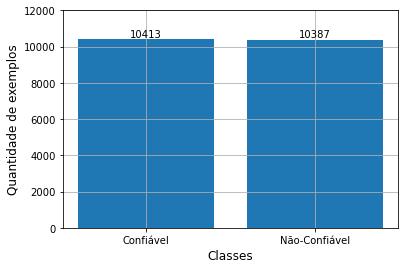

In [16]:
# Plota histograma com a quantidade de exemplos por classe.
fig, ax = plt.subplots()
bars = ax.bar(['Confiável','Não-Confiável'], df.label.value_counts())
for p in bars:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Quantidade de exemplos', fontsize=12)
plt.ylim([0, 12000])
plt.grid()
plt.show()

3. Agora, vamos contar o número de valores nulos no conjunto de dados. A presença de valores nulos prejudica o desempenho de modelos de *machine learning* em geral.

Execute a célula abaixo e perceba que os atributos **title**, **author** e **text** têm vários valores nulos, enquanto **id** e **label** não possuem valores nulos.

In [17]:
# Contando quantos valores nulos temos por coluna do banco de dados.
print(df.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


4. Uma forma simples de resolver o problema da presença de valores nulos, no caso de atributos de texto, como é o caso aqui (**title**, **author** e **text**), é simplesmente substituir os valores nulos por uma **string vazia**.

Execute a célula abaixo para substituir os valores nulos por uma **string vazia** e contar quantos valores nulos ainda temos. Perceba que não existem mais valores nulos após a substituição.

In [18]:
# Substituindo os valores nulos por uma string vazia.
df = df.fillna('')

# Contando quantos valores nulos temos por coluna do banco de dados.
print(df.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


5. Para a tarefa de classificação (i.e., treinamento e predição), iremos utilizar apenas as colunas **author** e **title** e, portanto, iremos combiná-las em uma única coluna, chamada de **content**.

Execute a célula abaixo para unir as duas colunas na coluna **content**.

In [19]:
# Unindo as colunas 'author' e 'title' em apenas uma.
df['content'] = df['author'] + ' ' + df['title']

6. Na sequência, iremos aplicar alguns pré-processamentos ao conjunto de dados. O primeiro deles é conhecido como **stemização** (do inglês, *stemming*). Estemização é o processo de reduzir palavras flexionadas (ou às vezes derivadas) ao seu tronco (stem), base ou raiz, geralmente uma forma da palavra escrita. Em outras palavras, stemização é o processo de reduzir uma palavra à sua palavra raiz.

**Exemplos**:

1. actor, actress, acting $\to$ act
2. eating, eats, eaten $\to$ eat

Execute a célula abaixo para aplicar stemização à coluna com o conteúdo que será usado para o treinamento dos modelos. A execução da célula abaixo pode levar alguns minutos.

In [20]:
# Instancia um objeto para estemizar o conteúdo.
port_stem = PorterStemmer()

# Atualiza as "stop-words".
nltk.download('stopwords')

# Define uma função que aplica a stemização ao conteúdo.
def stemming(content):
    review = re.sub('[^a-zA-Z]', ' ', content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

# Aplica a stemização à coluna conteúdo.
df['content'] = df['content'].apply(stemming)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felipe.figueiredo\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


7. Agora, vamos separar o dataframe em atributos e rótulos e, na sequência, converter os atributos (dados textuais) em dados numéricos. Para essa conversão, usaremos o valor da frequência do termo–inverso da frequência nos documentos (do inglês, term frequency–inverse document frequency - TF-IDF) para representar as palavras da coluna conteúdo (i.e., `content`).

TF-IDF é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos. 

O valor TF-IDF de uma palavra aumenta proporcionalmente à medida que aumenta o número de ocorrências dela em um documento, no entanto, esse valor é equilibrado pelo inverso da frequência da palavra na coleção de documentos, chamada de corpus. Isso auxilia a distinguir o fato da ocorrência de algumas palavras serem geralmente mais comuns que outras, como, por exemplo, artigos, preposições, etc.

Por exemplo, o artigo `um` deve ocorrer muitas vezes em um documento e, portanto, teria uma importância muito grande. Porém, o artigo `um` não é uma boa palavra-chave para distinguir documentos relevantes de não-relevantes. Assim, o inverso da frequência da palavra na coleção de documentos é incorporado para diminuir o peso dos termos que ocorrem mais frequentemente no conjunto de textos selecionados, ao mesmo tempo que aumenta o peso daqueles que ocorrem raramente.

Execute a célula abaixo para realizar a separação e converter as palavras.

**DICAS**:

+ Perceba que os dados são divididos em conjuntos de treinamento e validação, onde 80% deles vai para o conjunto de treinamento e o restante para o conjunto de validação.

In [21]:
# Atributos.
X_ = df['content'].values
# Rótulos.
y = df['label'].values

# Convertendo os dados textuais em dados numéricos.
vectorizer = TfidfVectorizer()
vectorizer.fit(X_)
X = vectorizer.transform(X_)

# Divide os dados em conjuntos de treinamento e validação.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

8. Agora, vamos usar busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os valores ideais para alguns dos parâmetros de um objeto da classe `LogisticRegression` de tal forma que o modelo classifique o melhor possível as duas classes.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de parâmetros de um modelo, neste caso, os parâmetros do objeto da classe `LogisticRegression`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus parâmetros. O dicionário de parâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `LogisticRegression` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `LogisticRegression` com todas as combinações possíveis dos parâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes parâmetros.

**DICAS**:

+ Ao instanciar o objeto da classe `LogisticRegression` configure os parâmetros de entrada `random_state` com a variável `seed` definida no item 1 deste exercício, ou seja, `random_state=seed` e `n_jobs` com o valor `-1`, ou seja, `n_jobs=-1`.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o melhor otimizador e (ii) a melhor abordagem de classificação.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'solver'` com as strings `'lbfgs'`, `'newton-cg'`, `'sag'` e `'saga'`.
    * `'multi_class'` com as strings `'ovr'` e `'multinomial'`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes parâmetros:
    * número de *folds* para o k-Fold igual a 5, ou seja, `cv=5`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='accuracy'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb). Só não se esqueça que você deve usar a classe `LogisticRegression` ou invés da `MLPRegressor` que está sendo usada no exemplo.
+ O treinamento pode ser um pouco demorado, então pegue um café e tenha paciência.

In [7]:
# Digite aqui o código do exercício.

9. Após o treinamento, imprima quais foram os melhores valores encontrados pela busca exaustiva, ou seja, o *grid search*.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [8]:
# Digite aqui o código do exercício.

10. Calcule e imprima a acurácia do modelo para os exemplos do **conjunto de validação** e, na sequência, plote a matriz de confusão do modelo também para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [9]:
# Digite aqui o código do exercício.

11. Use busca exaustiva (`GridSearchCV`) e o **conjunto de treinamento** para encontrar os valores ideais para alguns dos parâmetros de um objeto da classe `MLPClassifier` de tal forma que o modelo classifique o melhor possível as duas classes.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de parâmetros de um modelo, neste caso, os parâmetros do objeto da classe `MLPClassifier`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus parâmetros. O dicionário de parâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `MLPClassifier` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPClassifier` com todas as combinações possíveis dos parâmetros passados no dicionário `parameters` e retornar, ao final, a melhor combinação destes parâmetros.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure os parâmetros de entrada `max_iter` com o valor `10000`, ou seja, `max_iter=10000` e `random_state` com a variável `seed` definida no item 1 deste exercício, ou seja, `random_state=seed`.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós e camadas escondidas, (ii) a função de ativação ideal dos nós e (iii) o melhor otimizador.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com as tuplas `(4,)`, `(4, 2)`, `(6,)`, e `(6, 3)`.
    * `'activation'` com as strings `'logistic'`, e `'relu'`.
    * `'solver'` com as strings `'lbfgs'` e `'adam'`.
+ Ao instanciar o objeto da classe `GridSearchCV`, configure-o com os seguintes parâmetros:
    * número de *folds* para o k-Fold igual a 5, ou seja, `cv=5`.
    * acurácia como sendo a estratégia para avaliar o desempenho do modelo, ou seja, `scoring='accuracy'`.
    * usar todos os processadores disponíveis para acelerar a validação cruzada do modelo, ou seja, `n_jobs=-1`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb). Só não se esqueça que você deve usar a classe `MLPClassifier` ou invés da `MLPRegressor` que está sendo usada no exemplo.
+ O treinamento pode ser um pouco demorado, então pegue um café e tenha paciência.

In [10]:
# Digite aqui o código do exercício.

12. Após o treinamento, imprima quais foram os melhores valores encontrados pela busca exaustiva, ou seja, o *grid search*.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).

In [11]:
# Digite aqui o código do exercício.

13. Calcule e imprima a acurácia do modelo para os exemplos do **conjunto de validação** e, na sequência, plote a matriz de confusão do modelo também para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [12]:
# Digite aqui o código do exercício.

14. Plote curvas ROC para cada um dos dois classificadores (i.e., logistic regression e MLP) e imprima as áreas sob as curvas ROC para os dois classificadores.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [curva_roc_classificação_binária.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classifica%C3%A7%C3%A3o/curva_roc_classifica%C3%A7%C3%A3o_bin%C3%A1ria.ipynb).

In [13]:
# Digite aqui o código do exercício.

15. Após analisar todos os resultados obtidos com os dois classificadores (i.e., logistic regression e MLP), responda:

+ Qual dos dois modelos você utilizaria se fosse mais prejudicial para você a classificação de *fake news* como sendo notícias confiáveis (i.e., legítimas)? (**Justifique sua resposta**).
+ Qual dos dois modelos você utilizaria se fosse mais prejudicial para você a classificação de notícias confiáveis (i.e., legítimas) como sendo *fake news*? (**Justifique sua resposta**).

**DICAS**:

+ Lembre-que que a classe positiva neste exercício é a classe *fake news* (i.e., notícias não-confiáveis) e a classe negativa é a classe de notícias confiáveis.
+ Analise as matrizes de confusão dos dois classificadores.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**